# 4.1.1. N-Gram Analyse des Goldstandards

### Zielsetzung

1. Visuelle Darstellung der Anzahl der Tokens
2. Visuelle Darstellung von n-grams


## 2. Bibliotheken

Das Korpus wurde in Notebook 4.1. normalisiert und von Stopwörtern befreit. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path   
import seaborn as sns
from nltk.util import ngrams

## 3. Funktionen

In [2]:
def plot_top_ngrams_barchart(text, n, plot_headline):
    """
    Needs: 
    text: a string input from a pandas dataframe column 
    n: number to define the word-sequence (as int)
    plot_headline: Define the headline of the bar chart (string)
    Step 1: splits the text and saves everything in a list. 
            Note that all words of the dataframe are put in one list.
    Step 2: uses nltk.utils ngrams() to convert the list to bigrams
    Step 3: convert list to pandas dataframe with all n-grams as strings and their frequencies
    Step 4: saves the top 15 popular bigrams as a new pandas dataframe
    Step 5: visualize the top 15 popular bigrams in bar chart
    The following libaries are needed:
    from nltk.util import ngrams
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    """
    lst_df = text.str.split()
    lst_in_lst = lst_df.values.tolist()
    lst = [word for i in lst_in_lst for word in i]
    
    ngrams_list = list(ngrams(lst, n))
    
    ngrams_dict = {x:ngrams_list.count(x) for x in ngrams_list}
    df_ngrams = pd.DataFrame(list(ngrams_dict.items()), columns=['ngrams', 'Anzahl'])
    df_ngrams["ngrams"] = df_ngrams["ngrams"].astype(str)
    df_ngrams["ngrams"] = df_ngrams["ngrams"].str.strip('()')
    df_ngrams["ngrams"] = df_ngrams["ngrams"].str.replace("'","")
    df_ngrams["ngrams"] = df_ngrams["ngrams"].str.replace(",","")
    df_ngrams = df_ngrams.sort_values('Anzahl', ascending=False)
    
    df_popular_ngrams = df_ngrams[:15]
    y = df_popular_ngrams["Anzahl"]
    x = df_popular_ngrams["ngrams"]
    plt.figure(figsize=(10,12))
    sns.barplot(x=y,y=x)
    plt.title(plot_headline, fontsize = 20)
    plt.xlabel("Anzahl der ngrams", fontsize = 14)
    plt.ylabel("Top 15 der ngrams in Stellenanzeigen", fontsize = 14)

## 4. Erstellung des Datensets der Ground Truth und Preprocessing, um Vergleichbarkeit möglich zu machen

Sobald es um OCR geht, sind direkte Patterns inkl. darauffolgende Punkte schwer vereinheitlicht zu finden. Aus diesem Grund werden im Preprocessing jede Punktuation beseitigt.

### 4.1.Datenimport aus Notebook 4.1.

In [3]:
df = pd.read_csv('../output/4.1_text_preparation_ground_truth/text_prep_ground_truth.csv', sep =',')
df.head()

,Unnamed: 0,identifier,region_class,pub_id,pub_name,date,ground_truth_normalized,OCR_normalized,ground_truth_nP,ground_truth_Tokens,ground_truth_nSW_Tokens,ground_truth_nSW,Num_Token_ground_truth
0,0,aze_19130917_12_SEARCH_0,SEARCH,aze,Arbeiter-Zeitung,1913,kutscher polizeilich geprüft bittet um posten ...,kutscher um bachgasse,kutscher polizeilich geprüft bittet um posten ...,"['kutscher', 'polizeilich', 'geprüft', 'bittet...","['kutscher', 'polizeilich', 'geprüft', 'bittet...",kutscher polizeilich geprüft bittet posten xvi...,10
1,1,aze_19130917_12_OFFER_1,OFFER,aze,Arbeiter-Zeitung,1913,einige jüngere lustergürter finden dauernde be...,einige jüngere uustgirter finden danernde besc...,einige jüngere lustergürter finden dauernde be...,"['einige', 'jüngere', 'lustergürter', 'finden'...","['jüngere', 'lustergürter', 'finden', 'dauernd...",jüngere lustergürter finden dauernde beschäfti...,18
2,2,aze_19130917_12_OFFER_2,OFFER,aze,Arbeiter-Zeitung,1913,lehrmädchen zum kleidermachen wird aufgenommen...,lehrmädchen äum kleidermachen wird aufgenommen...,lehrmädchen zum kleidermachen wird aufgenommen...,"['lehrmädchen', 'zum', 'kleidermachen', 'wird'...","['lehrmädchen', 'kleidermachen', 'aufgenommen'...",lehrmädchen kleidermachen aufgenommen lehrzeit...,12
3,3,aze_19130917_12_OFFER_3,OFFER,aze,Arbeiter-Zeitung,1913,schneiderinnen 1111 ausfertigerinnen und kettl...,schneid erinnen ausferti an und kettlerinnen w...,schneiderinnen 1111 ausfertigerinnen und kettl...,"['schneiderinnen', '1111', 'ausfertigerinnen',...","['schneiderinnen', '1111', 'ausfertigerinnen',...",schneiderinnen 1111 ausfertigerinnen kettlerin...,14
4,4,aze_19130917_12_OFFER_4,OFFER,aze,Arbeiter-Zeitung,1913,als wäscherin oder bedienerin sucht eine frau ...,als wäscherin oder bedienerin sucht eine frau ...,als wäscherin oder bedienerin sucht eine frau ...,"['als', 'wäscherin', 'oder', 'bedienerin', 'su...","['wäscherin', 'bedienerin', 'sucht', 'frau', '...",wäscherin bedienerin sucht frau posten zuschri...,16


## 2. Verteilung der Wörter je Stellenanzeige

### Ground Truth Korpus

#### Gesamte Stellenanzeige

Text(0, 0.5, 'Anzahl der Stellenanzeigen')

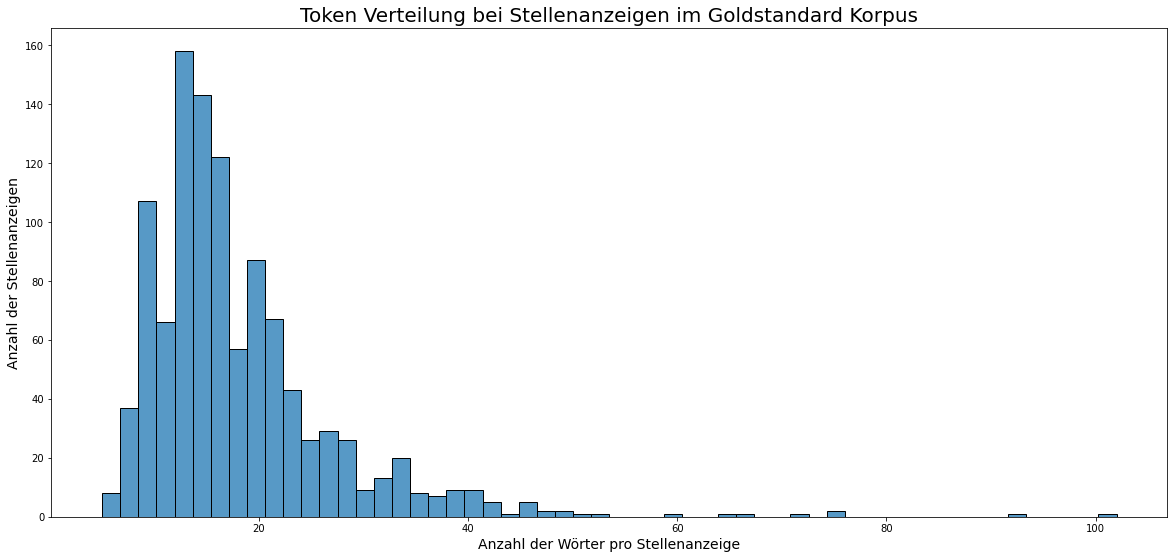

In [4]:
plt.figure(figsize=(20,9))
sns.histplot(df["Num_Token_ground_truth"])
plt.title("Token Verteilung bei Stellenanzeigen im Goldstandard Korpus", fontsize = 20)
plt.xlabel("Anzahl der Wörter pro Stellenanzeige", fontsize = 14)
plt.ylabel("Anzahl der Stellenanzeigen", fontsize = 14)

In [5]:
df["Num_Token_ground_truth"].describe()

count    1076.000000
mean       18.063197
std         9.396076
min         5.000000
25%        12.000000
50%        16.000000
75%        21.000000
max       102.000000
Name: Num_Token_ground_truth, dtype: float64

75% aller Communication-Teile haben 13 oder mehr Wörter. 50% enthalten sogar 17 oder mehr Wörter.
Mehr als 30 Tokens haben allerdings nur sehr wenige Stellenanzeigen

## N-Grams

### Bi-Grams (mit Stopwords)

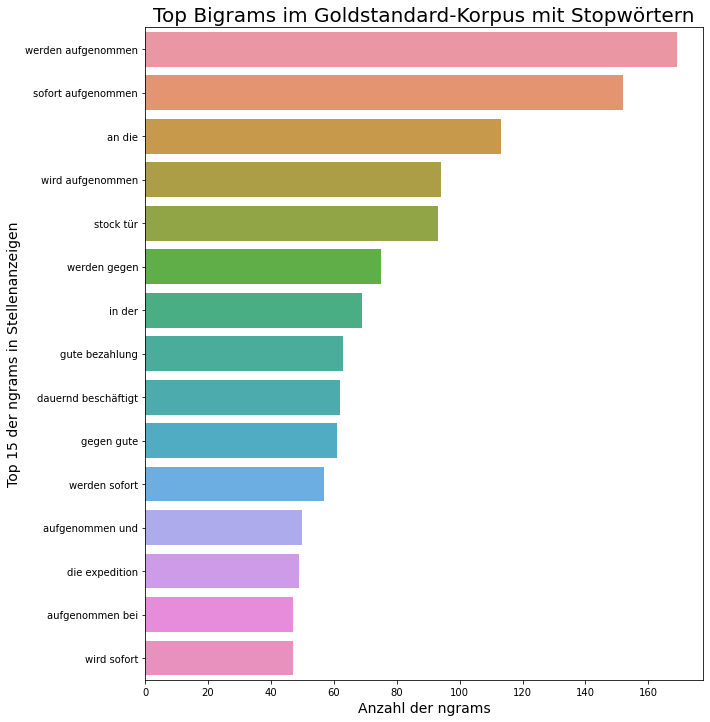

In [6]:
plot_top_ngrams_barchart(df["ground_truth_normalized"], 2, "Top Bigrams im Goldstandard-Korpus mit Stopwörtern")

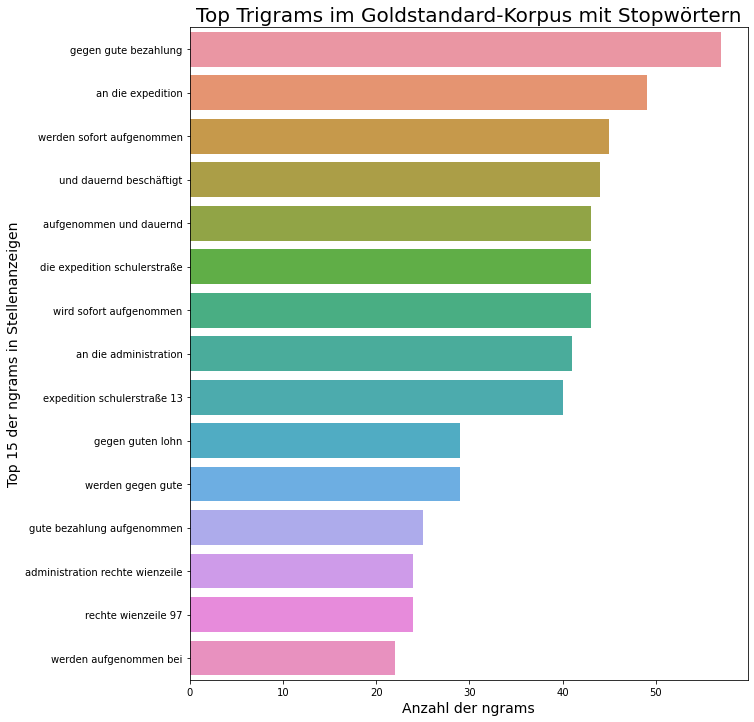

In [7]:
plot_top_ngrams_barchart(df["ground_truth_normalized"], 3, "Top Trigrams im Goldstandard-Korpus mit Stopwörtern")

## Check, ob es hilft die Stopwords herauszunehmen

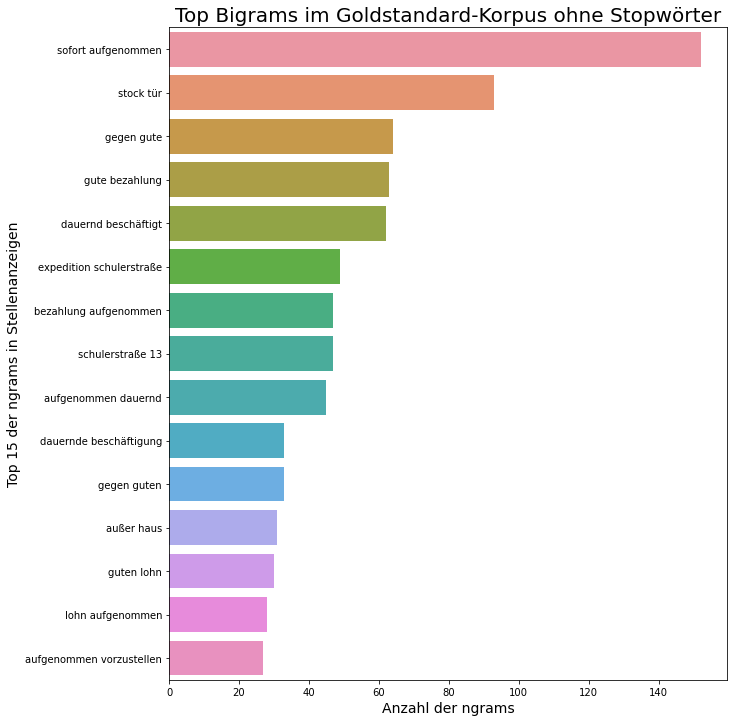

In [8]:
plot_top_ngrams_barchart(df["ground_truth_nSW"], 2, "Top Bigrams im Goldstandard-Korpus ohne Stopwörter")

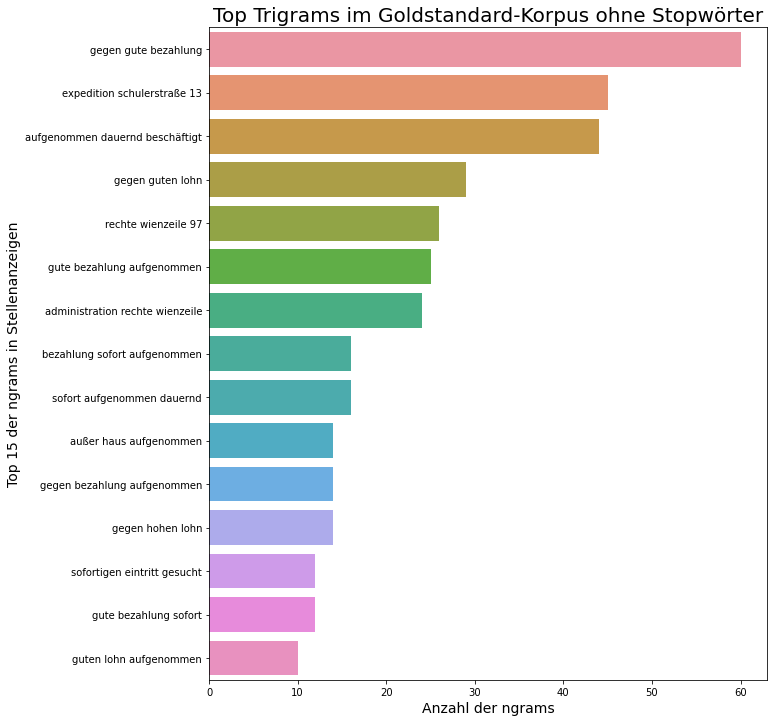

In [9]:
plot_top_ngrams_barchart(df["ground_truth_nSW"], 3, "Top Trigrams im Goldstandard-Korpus ohne Stopwörter")